# Cryptocurrency Research

## 1) Попробуем создать модель, предсказывающую капитализацию BTC

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
bitcoin=pd.read_csv("coin_Bitcoin.csv")
bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [10]:
bitcoin.drop(["Name"],axis=1, inplace=True)
bitcoin.drop(["SNo"],axis=1, inplace=True)
bitcoin.drop(["Symbol"],axis=1, inplace=True)

bitcoin = bitcoin[242:].reset_index(drop=True)
bitcoin['Marketcap'] = bitcoin['Marketcap'] / 10**9

In [11]:
import datetime as dt
bitcoin["Date"]=pd.to_datetime(bitcoin["Date"])
bitcoin['Date_year'] = bitcoin["Date"].dt.year
bitcoin['Date_month'] = bitcoin["Date"].dt.month
bitcoin['Date_day'] = bitcoin["Date"].dt.day
bitcoin['Date_hour'] = bitcoin["Date"].dt.hour
bitcoin['Date_minute'] = bitcoin["Date"].dt.minute
bitcoin['Date_second'] = bitcoin["Date"].dt.second
bitcoin.drop(["Date"],axis=1, inplace=True)
bitcoin.head()

,High,Low,Open,Close,Volume,Marketcap,Date_year,Date_month,Date_day,Date_hour,Date_minute,Date_second
0,777.510010,713.599976,763.280029,735.070007,46862700.0,8.955395,2013,12,27,23,59,59
1,747.059998,705.349976,737.979980,727.830017,32505800.0,8.869919,2013,12,28,23,59,59
2,748.609985,714.440002,728.049988,745.049988,19011300.0,9.082104,2013,12,29,23,59,59
3,766.599976,740.239990,741.349976,756.130005,20707700.0,9.217168,2013,12,30,23,59,59
4,760.580017,738.169983,760.320007,754.010010,20897300.0,9.191325,2013,12,31,23,59,59


In [12]:
X=bitcoin.drop(["Marketcap"], axis=1)
Y=bitcoin["Marketcap"]


В контексте задачи прогнозирования капитализации биткоина уместно будет использовать модель линейной регрессии (логистическая регрессия не является подходящим выбором,так как она используется для задач классификации, которые требуют предсказать вероятность принадлежности к определенным категориям или классам.

В данном случае использование accuracy_score не подходит для оценки качества модели, так как это метрика для задач классификации, а не для задачи регрессии. Вместо него воспользуемся коэффициентом детерминации (R^2), который показывает, насколько успешно модель "подходит" к нашим данным:  

Формула для R^2:

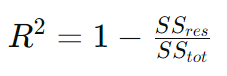

где $SSres$ - сумма квадратов остатков (расстояние между фактическими значениями и предсказанными значениями), а $SStot$- общая сумма квадратов (расстояние между фактическими значениями и средним значением целевой переменной).

R-квадрат (Коэффициент детерминации): Эта метрика предоставляет индикацию качества соответствия набора предсказаний фактическим значениям.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2_score = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R^2):", r2_score)

print('')

mse = mean_squared_error(y_test, y_pred)
print("Средняя квадратичная ошибка (MSE):", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Средняя абсолютная ошибка (MAE):", mae)

rmse = sqrt(mse)
print("Корень из средней квадратичной ошибки (RMSE):", rmse)

Коэффициент детерминации (R^2): 0.9993952996206203

Средняя квадратичная ошибка (MSE): 26.4268250740594
Средняя абсолютная ошибка (MAE): 3.306468845270473
Корень из средней квадратичной ошибки (RMSE): 5.140702780171151


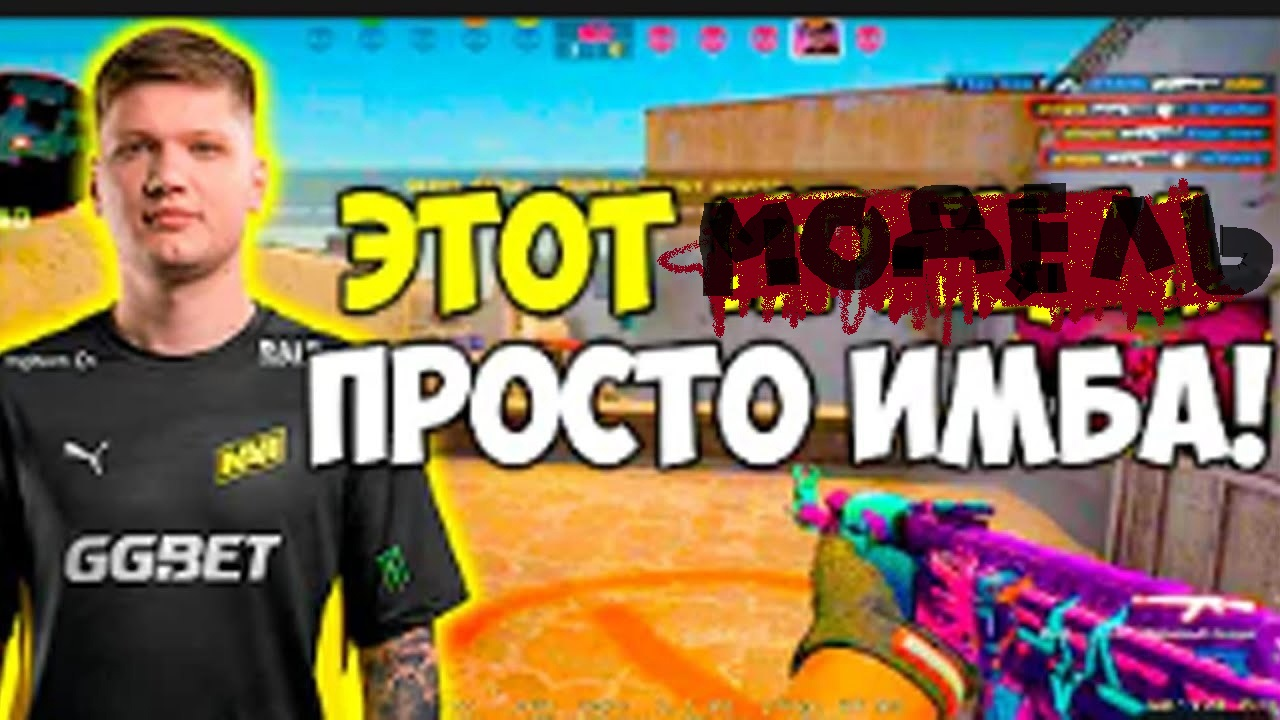

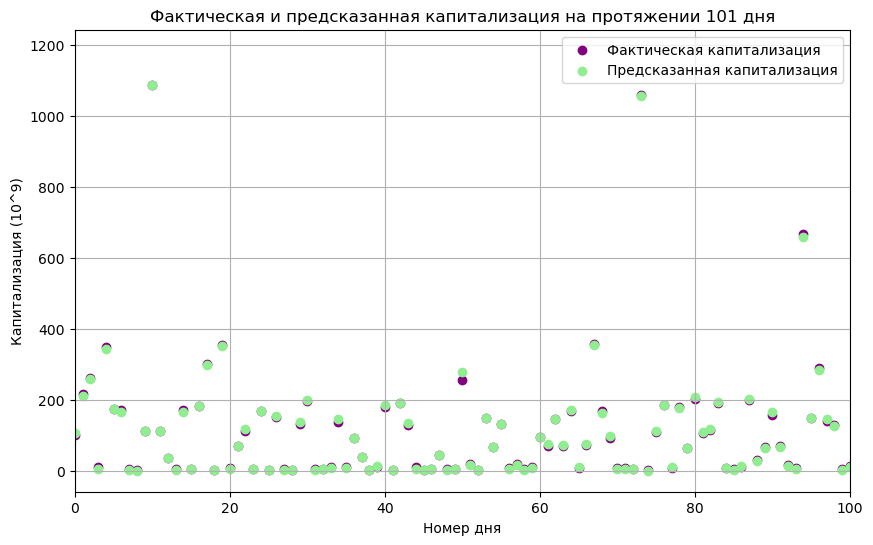

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='purple', label='Фактическая капитализация')
plt.scatter(range(len(y_pred)), y_pred, color='lightgreen', label='Предсказанная капитализация')

plt.ylabel('Капитализация (10^9)')
plt.xlabel('Номер дня')
plt.title('Фактическая и предсказанная капитализация на протяжении 101 дня')
plt.legend()
plt.grid(True)
plt.xlim(0, 100)

plt.show()

Количество дней можно повысить, но тогда график станет менее наглядным.

Коэффициент детерминации близок к 1, что свидетельствует о том, что  модель линейной регрессии хорошо соотносится с данными и хорошо объясняет изменчивость целевой переменной.

Однако это не повод инвеcтировать в btc, так как наша модель хорошо работает только на тестовых данных и не обобщается на новые, потому что она описывает не все факторы, влияющие на цену btc, но ее огромный плюс в наглядности и относительной простоте. Рынок крипты крайне сложен и подвержен множеству внешних воздействий (манипуляций), которые никак не описать.

## 2) Изучим корреляцию стоимости разных криптовалют

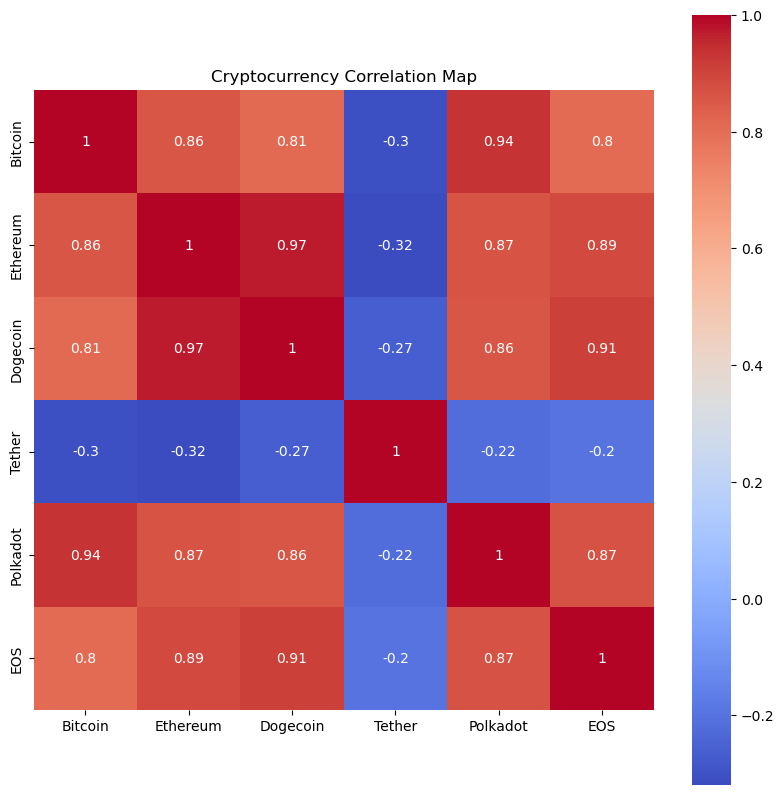

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

files_to_use = ["coin_Bitcoin.csv", "coin_Ethereum.csv", "coin_Dogecoin.csv", "coin_Tether.csv","coin_Polkadot.csv", "coin_EOS.csv"]

df = pd.DataFrame()

for filename in files_to_use:
    currency_name = filename.split("_")[1].split(".")[0]  # Извлекаем название криптовалюты из имени файла
    temp_df = pd.read_csv(filename, usecols=["Date", "Close"], parse_dates=["Date"])
    temp_df.columns = ["Date", currency_name]

    if df.empty:
        df = temp_df
    else:
        df = df.merge(temp_df, on="Date",) # Объединяем датафреймы по столбцу "Date"    

corrmat = df.corr(method='spearman') # Используем тест ранговой корреляции Спирмена

corrmat = corrmat.drop(columns=["Date"]).drop(index=["Date"])

# Создаем тепловую карту
plt.figure(figsize=(10, 10))
sns.heatmap(corrmat, vmax=1., square=True, annot=True, cmap="coolwarm")
plt.title("Cryptocurrency Correlation Map")
plt.show()

Из этой матрицы наглядно видно, что цены альткоинов зачастую сильно коррелируют с ценой btc, то есть если btc испытывает сильное движение вверх или вниз, то это влияет на общее настроение рынка криптовалют и приводит к аналогичному движению цен на альткоинах, это активно используют day trades.

## 3) Стратегия DCA на BTC

DCA - это стратегия, при которой инвестор делит фиксированную сумму денег на равные части и инвестирует эти деньги на регулярной основе, независимо от цены актива.

Цель - анализ эффективности применения стратегии DCA на BTC.


Предположим, что мы инвестируем 1$ раз в день на протяжении 1825 дней с 27ого декабря 2013 года по 26ое декабря 2018 года.

In [39]:
bitcoin['btc_bought_daily'] = 1 / bitcoin['Close']
bitcoin['sum_btc_daily'] = bitcoin['btc_bought_daily'].cumsum()

bitcoin['btc_bought_daily_usd'] = bitcoin['sum_btc_daily'] * bitcoin['Close']

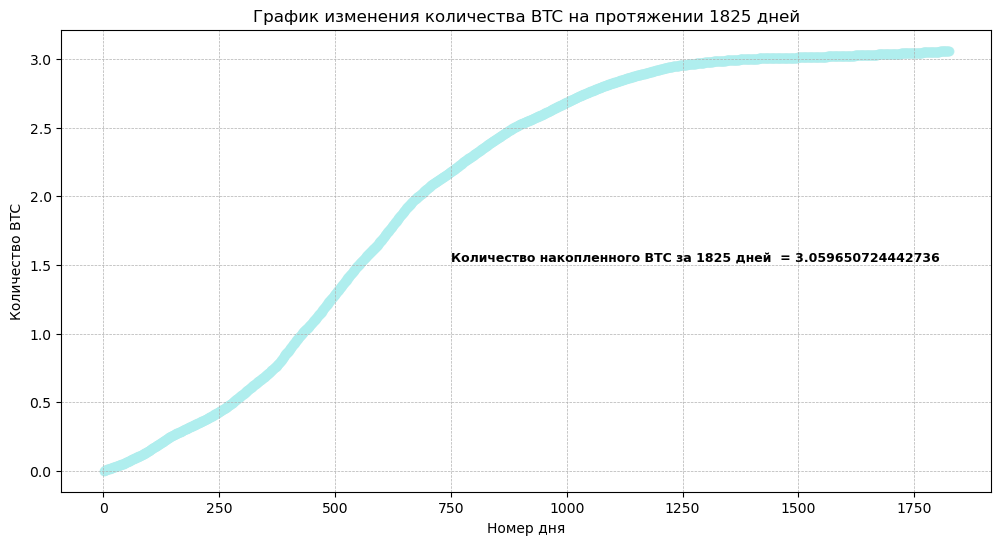

In [41]:
days = list(range(1, 1826)) 
bitcoin_accumulated = bitcoin['sum_btc_daily'][:1825]

plt.figure(figsize=(12, 6))
plt.scatter(days, bitcoin_accumulated, color='paleturquoise', alpha=0.6)
plt.title("График изменения количества BTC на протяжении 1825 дней")
plt.xlabel("Номер дня")
plt.ylabel("Количество BTC")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

total_btc = f'Количество накопленного BTC за 1825 дней  = {bitcoin_accumulated[1824]}' 
plt.annotate(total_btc, (750, bitcoin_accumulated.max()/2), fontweight='bold', fontsize=9)

plt.show()

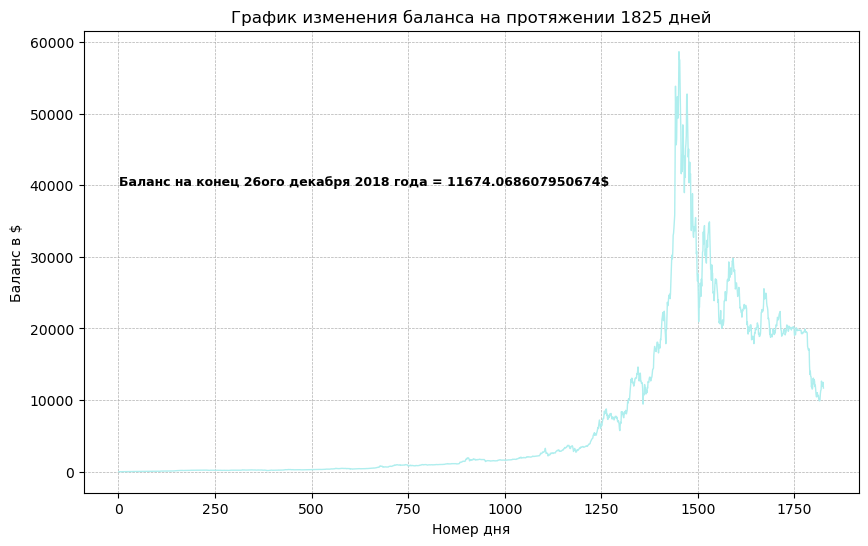

In [66]:
days = range(1, 1826)  
bitcoin_accumulated_usd = bitcoin['btc_bought_daily_usd'][:1825]

plt.figure(figsize=(10, 6))
plt.plot(days, bitcoin_accumulated_usd, color='paleturquoise', linewidth=1)
plt.title("График изменения баланса на протяжении 1825 дней")
plt.xlabel("Номер дня")
plt.ylabel("Баланс в $")

total_btc_usd = f'Баланс на конец 26ого декабря 2018 года = {bitcoin_accumulated_usd[1824]}$' 
plt.annotate(total_btc_usd, (1, 40000), fontweight='bold', fontsize=9)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Итого мы потратили в общей сложности 1825$

Баланс на кошельке на конец 26ого декабря 2018 года составляет 11674$

Вывод: использовать стратегию DCA в инвестировании в BTC в период времени с начала 2014 года по конец 2018 было не ошибкой!!